In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sc
import scipy as sp
from scipy import signal
import pandas as pd
import statsmodels.stats.diagnostic as sm
import math
import obspy
from obspy.signal.detrend import polynomial
from statsmodels.tsa import stattools

In [2]:
dados = sc.loadmat('simcosta_sp1_clean2.mat')
freqanual =pd.read_csv('freqanual.dat')
fu =pd.read_csv('fu.dat')
tu =pd.read_csv('tu.dat')
freqanual=np.array(freqanual)
fu=np.array(fu)
tu=np.array(tu)
chla2 = dados['chla2']
T2 = dados['T2']
S2 = dados['S2']
Turb2 = dados['Turb2']
t = dados['t']
CDOM2 = dados['CDOM2']
plt.style.use('ggplot')

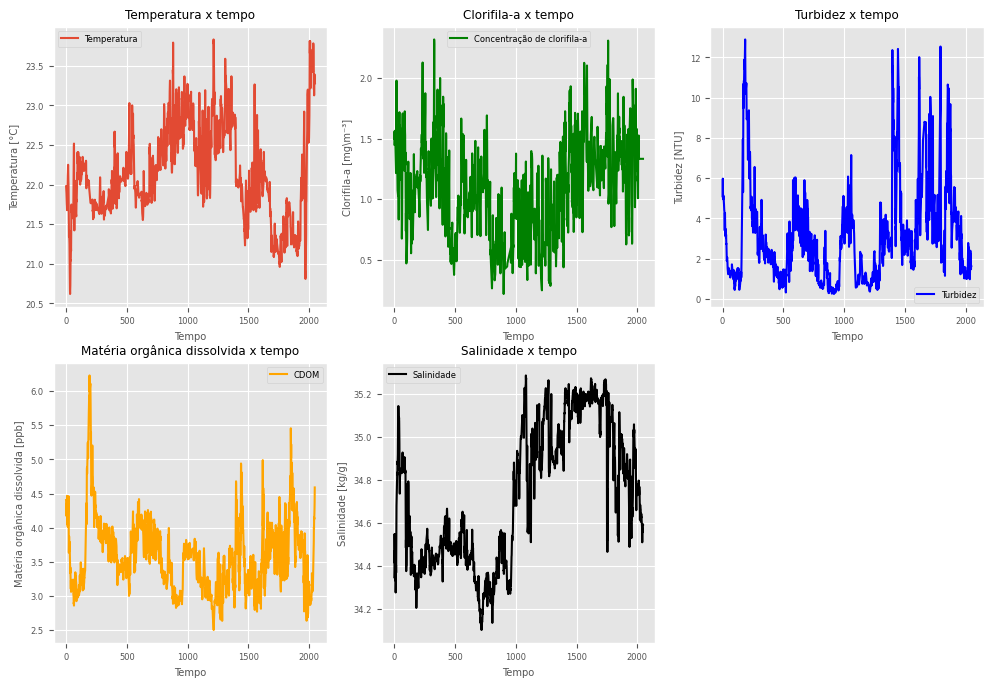

In [3]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})

plt.subplot(231)
plt.plot(T2[0,:],label='Temperatura')
plt.title('Temperatura x tempo')
plt.xlabel('Tempo')
plt.ylabel('Temperatura [°C]')

plt.legend()
plt.subplot(232)
plt.plot(chla2[0,:],label='Concentração de clorifila-a',color='green')
plt.title('Clorifila-a x tempo')
plt.xlabel('Tempo')
plt.ylabel('Clorifila-a [mg\m⁻³]')

plt.legend()
plt.subplot(233)
plt.plot(Turb2[0,:],label='Turbidez',color='b')
plt.legend()
plt.title('Turbidez x tempo')
plt.xlabel('Tempo')
plt.ylabel('Turbidez [NTU]')
plt.subplot(234)
plt.plot(CDOM2[0,:],label='CDOM',color='orange')
plt.title('Matéria orgânica dissolvida x tempo')
plt.xlabel('Tempo')
plt.ylabel('Matéria orgânica dissolvida [ppb]')
plt.legend()
plt.subplot(235)
plt.title('Salinidade x tempo')
plt.xlabel('Tempo')
plt.ylabel('Salinidade [kg/g]')
plt.plot(S2[0,:],label='Salinidade',color='black')
plt.legend()

In [4]:
T1 = signal.savgol_filter(T2[0,:],71,2)
chla = signal.savgol_filter(chla2[0,:],71,2)
Turb = signal.savgol_filter(Turb2[0,:],71,2)
CDOM = signal.savgol_filter(CDOM2[0,:],71,2)
S = signal.savgol_filter(S2[0,:],71,2)

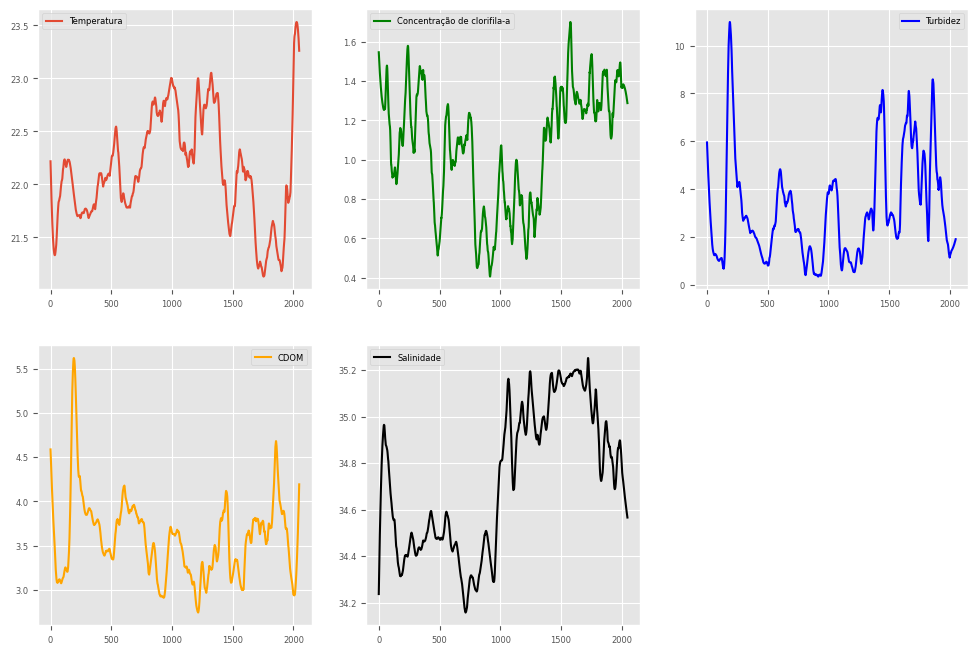

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(T1,label='Temperatura')
plt.legend()
plt.subplot(232)
plt.plot(chla,label='Concentração de clorifila-a',color='green')
plt.legend()
plt.subplot(233)
plt.plot(Turb,label='Turbidez',color='b')
plt.legend()
plt.subplot(234)
plt.plot(CDOM,label='CDOM',color='orange')
plt.legend()
plt.subplot(235)
plt.plot(S,label='Salinidade',color='black')
plt.legend()

In [6]:
altaT1 = T2[0,:]-T1
altachla = chla2[0,:]-chla
altaTurb = Turb2[0,:]-Turb
altaCDOM = CDOM2[0,:]-CDOM
altaS= S2[0,:]-S

In [30]:
frr = 1/(1/3600)

In [33]:
fT, PT = signal.welch(altaT1,frr)
fC, Pc = signal.welch(altachla,frr)
fTu,PTu =signal.welch(altaTurb,frr) 
fC,PC=signal.welch(altaCDOM,frr)
fS,PS=signal.welch(altaS,frr)

bfT, bPT = signal.welch(T1)
bfC, bPc = signal.welch(chla)
bfTu,bPTu =signal.welch(Turb) 
bfC,bPC=signal.welch(CDOM)
bfS,bPS=signal.welch(S)

Text(0, 0.5, 'PSD [V**2/Hz]')

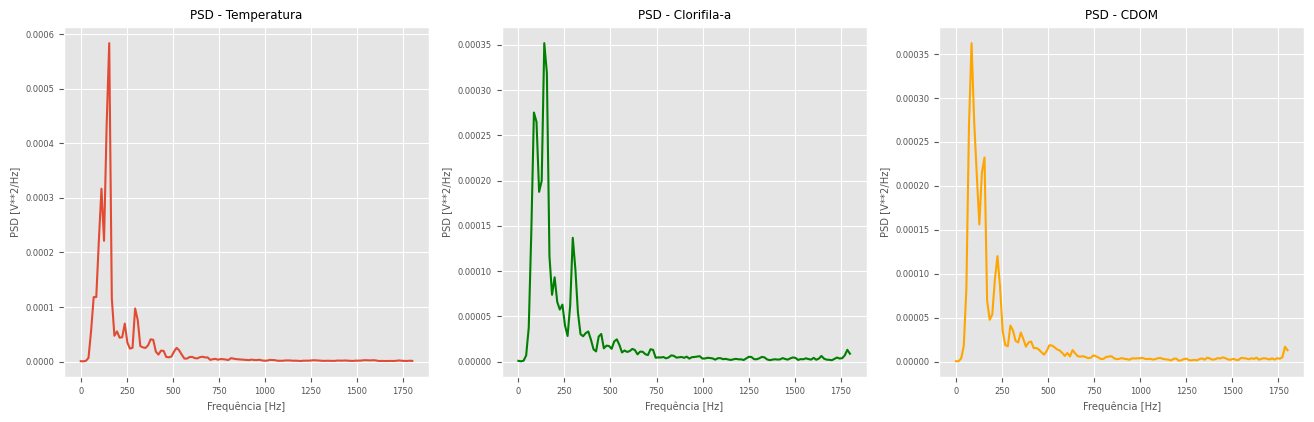

In [36]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.plot(fT, PT)
plt.title('PSD - Temperatura')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.subplot(232)
plt.plot(fC, Pc,color='green')
plt.title('PSD - Clorifila-a')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.subplot(233)

plt.plot(fC,PC,color='orange')
plt.title('PSD - CDOM')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')



Text(0, 0.5, 'PSD [V**2/Hz]')

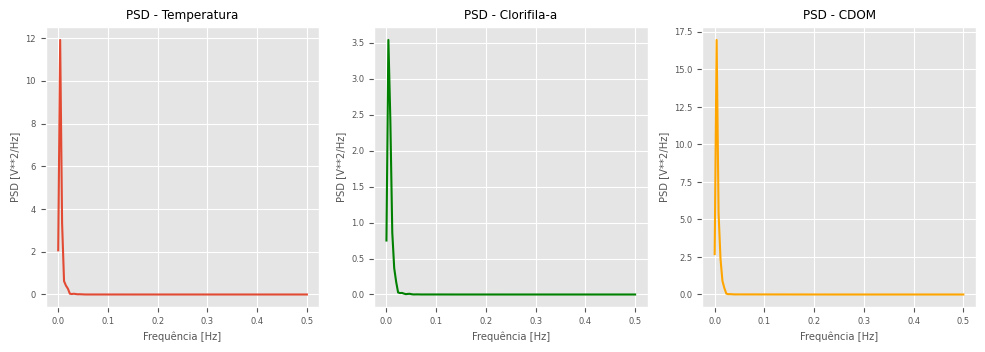

In [9]:
plt.figure(figsize=(12,8))
plt.subplot(231)
plt.plot(bfT, bPT)
plt.title('PSD - Temperatura')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.subplot(232)
plt.plot(bfC, bPc,color='green')
plt.title('PSD - Clorifila-a')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.subplot(233)

plt.plot(bfC,bPC,color='orange')
plt.title('PSD - CDOM')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')



/home/aluno001/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 64, using nperseg = 64
  warnings.warn('nperseg = {0:d} is greater than input length '
/home/aluno001/anaconda3/lib/python3.9/site-packages/scipy/signal/spectral.py:1964: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  warnings.warn('nperseg = {0:d} is greater than input length '


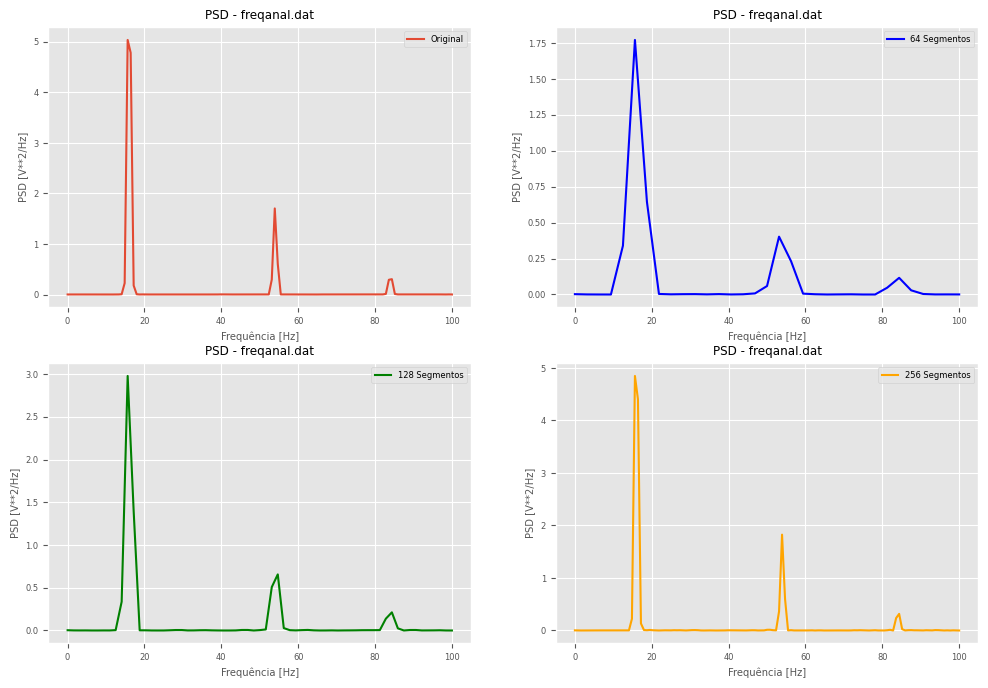

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(221)
fa,Pa=signal.welch(freqanual[:,0],fs=200)
plt.plot(fa, Pa,label='Original')
plt.title('PSD - freqanal.dat')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()

plt.subplot(222)
fa,Pa=signal.welch(freqanual[:64,0],fs=200)
plt.plot(fa, Pa,'b',label='64 Segmentos')
plt.title('PSD - freqanal.dat')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()


plt.subplot(223)
fa,Pa=signal.welch(freqanual[:128,0],fs=200)
plt.plot(fa, Pa,'g',label='128 Segmentos')
plt.title('PSD - freqanal.dat')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()


plt.subplot(224)
fa,Pa=signal.welch(freqanual[:256,0],fs=200)
plt.plot(fa, Pa,'orange',label='256 Segmentos')
plt.title('PSD - freqanal.dat')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()


In [28]:
t = np.arange(start=0, stop=10, step=0.005)
y = freqanual[:,0]
f = 110
y = y +( 3 * np.sin(2 * np.pi * f * t))

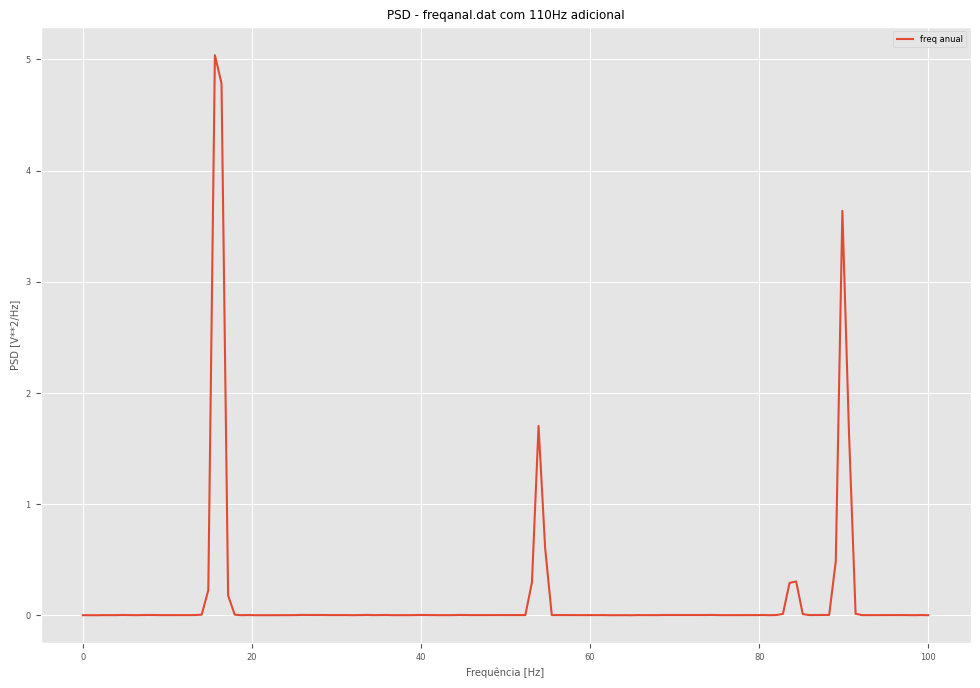

In [29]:
fra,Pra=signal.welch(y,len(y)/10)
plt.figure(figsize=(12,8))
plt.plot(fra, Pra,label='freq anual')
plt.title('PSD - freqanal.dat com 110Hz adicional')
plt.xlabel('Frequência [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.legend()

In [13]:
logbinsfu = np.logspace(np.log10(-11.84789),np.log10(8.557968),11)
logbinstu = np.logspace(np.log10(np.min(tu[:,0])),np.log10(np.max(tu[:,0])),11)

/tmp/ipykernel_4244/1234589897.py:1: RuntimeWarning: invalid value encountered in log10
  logbinsfu = np.logspace(np.log10(-11.84789),np.log10(8.557968),11)


/tmp/ipykernel_4244/2266117341.py:8: RuntimeWarning: invalid value encountered in log10
  plt.hist(np.log10(fu[:,0]),label='Dados independentes - variável x',color='g')


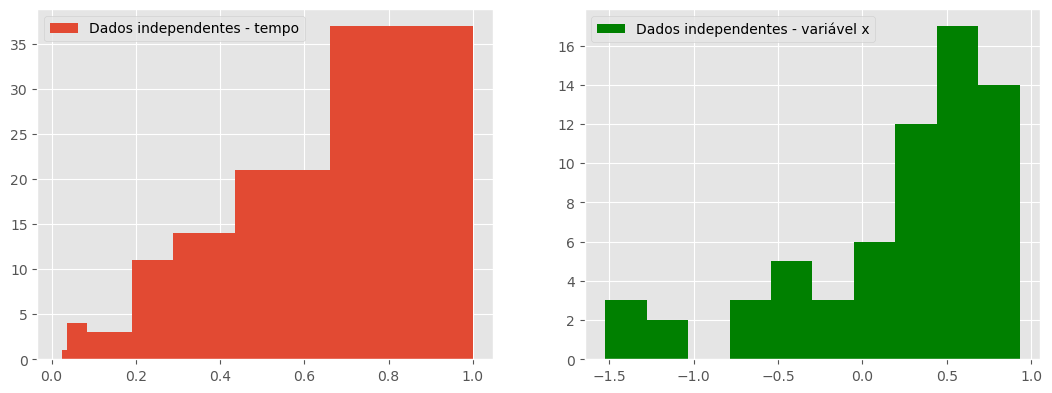

In [14]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 10})

plt.subplot(231)
plt.hist(tu[:,0], bins=logbinstu,label='Dados independentes - tempo')
plt.legend()
plt.subplot(232)
plt.hist(np.log10(fu[:,0]),label='Dados independentes - variável x',color='g')
plt.legend()

In [15]:
pgram = signal.lombscargle(tu[:,0], fu[:,0], 1/tu[:,0] ,normalize=True)

Text(0, 0.5, 'PSD Normalizada')

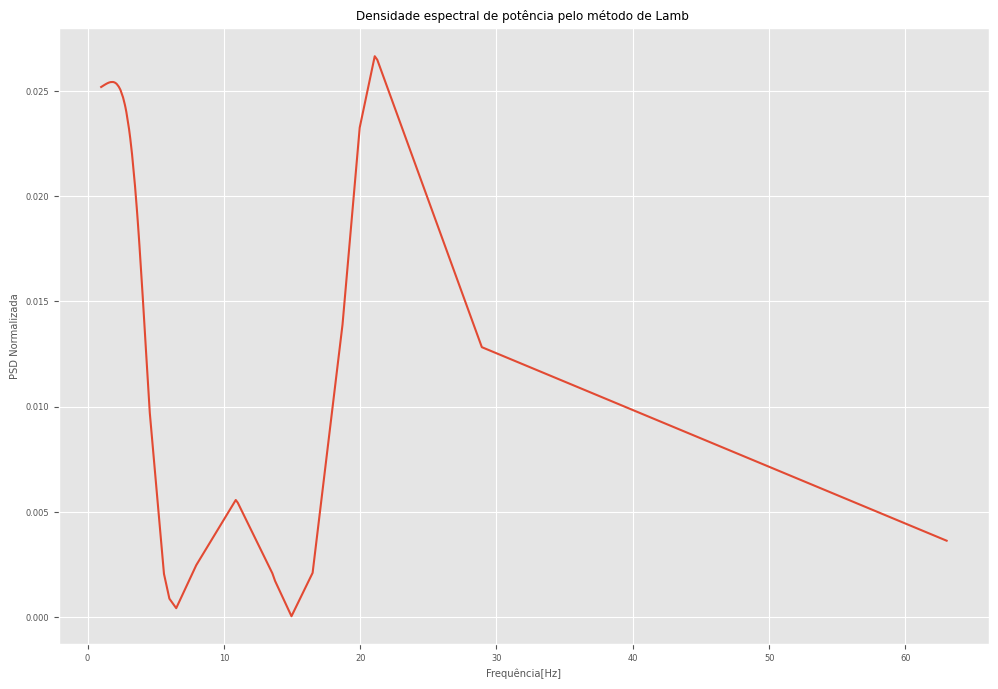

In [16]:
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 6})
plt.plot(1/tu[:,0], pgram)
plt.title('Densidade espectral de potência pelo método de Lamb ')
plt.xlabel('Frequência[Hz]')
plt.ylabel('PSD Normalizada')